<a href="https://colab.research.google.com/github/nitish9801/colab/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
file_path = tf.keras.utils.get_file("iris.csv", url)

# Column Name not present in csv
column_name = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]


      0/Unknown 0s 0s/step

In [3]:
df = pd.read_csv(file_path, header=None, names=column_name)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])


array([0, 1, 2])

In [26]:
# Features and Labels
X = df.drop("species", axis=1).values
y = tf.keras.utils.to_categorical(df["species"], num_classes=3)


In [32]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [33]:
X_train.shape

(105, 4)

In [37]:
# Feature normalization

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

In [41]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(shape=(4,)),
        normalizer,
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax"),
    ]
)

In [42]:
# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9976 - loss: 0.0211 - val_accuracy: 0.9333 - val_loss: 0.0954
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9785 - loss: 0.0498 - val_accuracy: 0.9333 - val_loss: 0.0991
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9785 - loss: 0.0465 - val_accuracy: 0.9556 - val_loss: 0.0989
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9863 - loss: 0.0363 - val_accuracy: 0.9333 - val_loss: 0.0983
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9902 - loss: 0.0293 - val_accuracy: 0.9333 - val_loss: 0.0979
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9948 - loss: 0.0276 - val_accuracy: 0.9333 - val_loss: 0.0956
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9785 - loss: 0.0476 - val_accuracy: 0.9333 - val_loss: 0.0975
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9863 - loss: 0.0379 - val_accuracy: 0.9333 - val_loss:

In [51]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9347 - loss: 0.0948
Loss: 0.0956035628914833, Accuracy: 0.9333333373069763


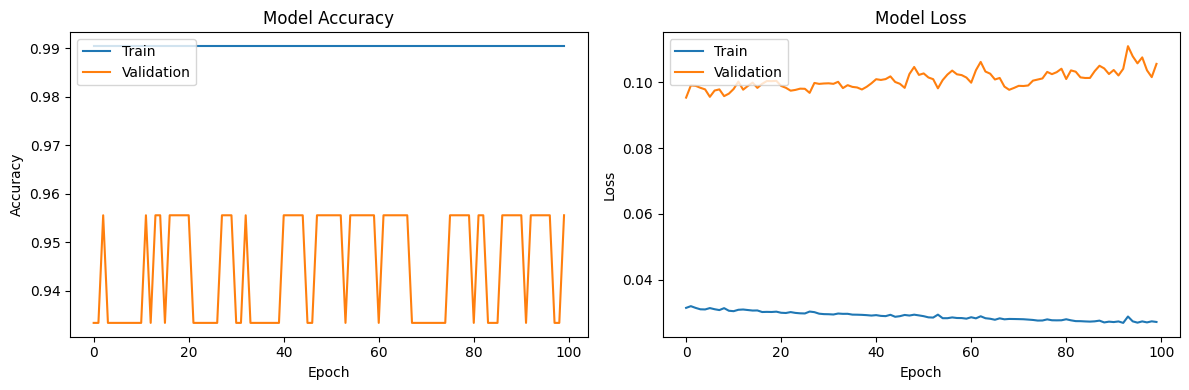

In [61]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Plots the training and validation loss and accuracy over epochs."""
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history)


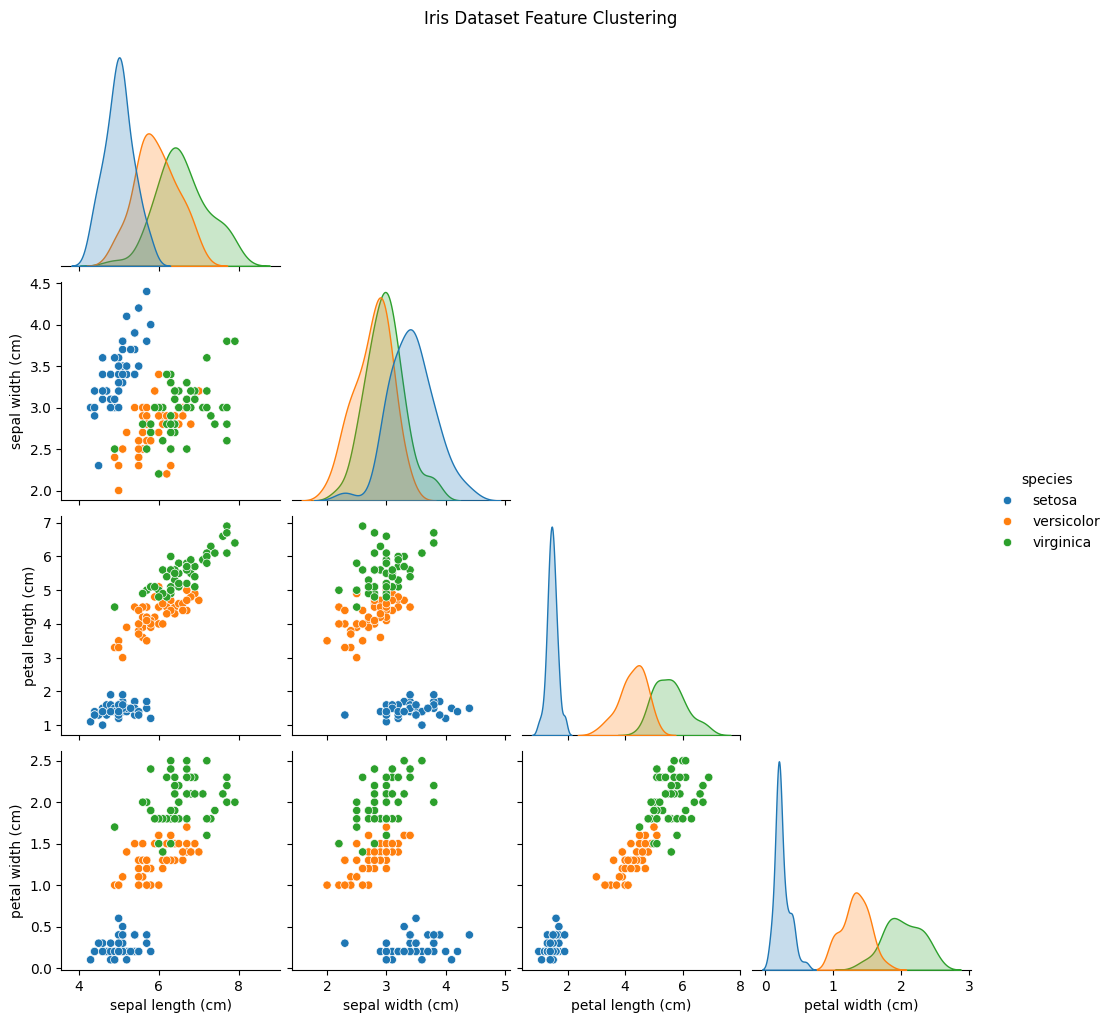

In [64]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load iris dataset from sklearn (offline, no internet needed)
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target_names[iris.target]

# Plot pairwise feature relationships
sns.pairplot(df, hue="species", diag_kind="kde", corner=True)
plt.suptitle("Iris Dataset Feature Clustering", y=1.02)
plt.show()

In [65]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


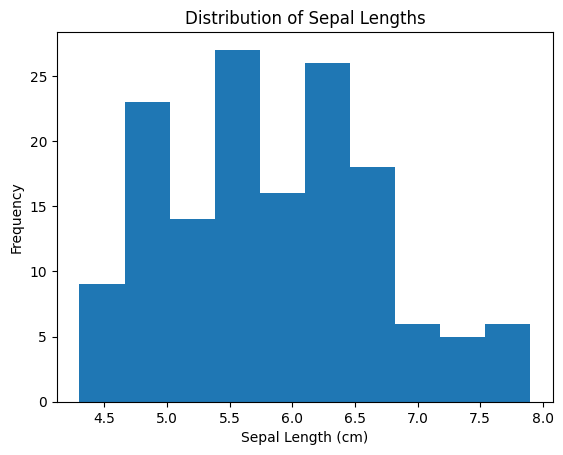

In [82]:
# prompt: Using dataframe df: need to print sepal length feature of dataset and plot the graph for it

import matplotlib.pyplot as plt

# Print the sepal length column
print(df['sepal length (cm)'])

# Plot a histogram of the sepal length
plt.hist(df['sepal length (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Lengths')
plt.show()

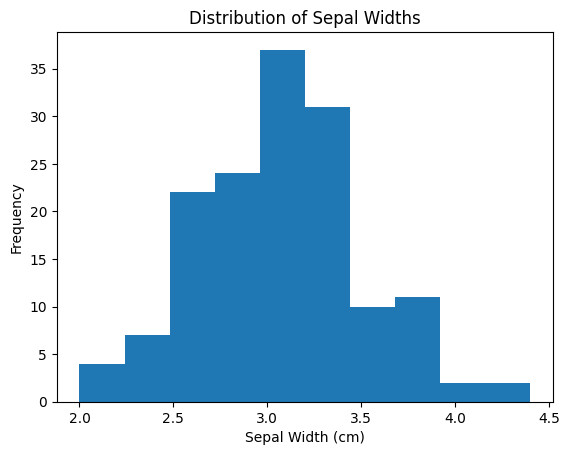

In [86]:
plt.hist(df["sepal width (cm)"])
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.title("Distribution of Sepal Widths")
plt.show()